In [1]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [3]:
#reading of data
path=input("enter path ")
f=pd.read_csv(path,header=-1)

#shuffeling data
x=shuffle(np.array(f))
[m,n]=np.shape(x)

#taking number of units
units=input("enter no of units ")

enter path "F:\\WOC\\image1.csv"
enter no of units 3


In [4]:
#assigning random values 

#values of theta for hidden layer
theta1=[]
for i in range(0,units):
    theta1=np.append(theta1,np.array([rd.random()*10 for j in range(0,n)]))
theta1=theta1.reshape(units,n)

#values of theta for output unit
theta=np.array([rd.random()*10 for i in range(0,units)])
theta0=rd.random()*10
theta=theta.reshape(1,units)

In [5]:
#normalising data
x1=[]
x1=np.append(x1,[1.0 for i in range(0,m)])
for i in range(0,n-1):
    x1=np.append(x1,(x[:,i]-np.mean(x[:,i]))/np.ptp(x[:,i]))
x1=x1.reshape(n,m)

y=x[:,n-1]-1

#learning rate
a=0.05


In [6]:
#applying forward propagation -> backpropagation ->gradient descent
J=[]
for i in range(0,400):
    
    #forward propagation
    z1=theta0+np.dot(theta1,x1)
    
    a1=1/(1+np.exp(-z1))
    
    z=np.dot(theta,a1)
    h=1/(1+np.exp(-z))
    
    #cost function 
    J=np.append(J,-(np.sum(y*np.log(h)+(1-y)*np.log(1-h)))/m)
    
    #applying backpropagation
    del3=h-y
    
    delta=np.dot(np.dot(np.transpose(theta),del3)*a1*(1-a1),np.transpose(x1))
    a_2=[1.0 for p in range(0,m)]
    a_2=np.append(a_2,a1)
    a_2=a_2.reshape(units+1,m)
    delta2=np.dot(del3,np.transpose(a_2))
    
    delta=delta/m
    delta2=delta2/m
    
    #updating values of theta
    theta1=theta1-a*delta
    theta0=theta0-a*delta2[0,0]
    theta=theta-a*delta2[0,1:]
   

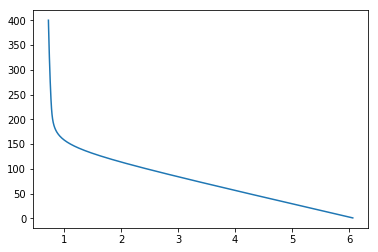

In [7]:
plt.plot(J,np.arange(1,401))